# Rohan Khaitan MDS201812

# Iris Data

In [1]:
import pandas as pd
import numpy as np
import sklearn
import chardet
import os


In [2]:
os.chdir("/home/rohan/CMI/SEM 2/AML/Iris/iris-data")

In [3]:
data_raw=pd.read_csv('Iris.csv', encoding = 'Latin-1')

In [4]:
data_raw.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data_raw.shape

(150, 6)

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [7]:
data_raw['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
data_raw["Species"]=data_raw["Species"].map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [9]:
data_raw.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
data=data_raw.drop(['Id','Species'],axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y_true=data_raw['Species']
y_true.shape

(150,)

# k-means Clustering

K-means clustering is a type of unsupervised learning, which is used when we have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data,with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data)
kmeans.cluster_centers_.shape

(3, 4)

In [13]:
x=pd.DataFrame(clusters)
x[0].unique()

array([1, 0, 2])

In [14]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(y_true[mask])[0]

In [15]:
x=pd.DataFrame(labels)
x[0].unique()

array([0, 1, 2])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,labels )

0.8933333333333333

In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(data,labels )

0.5525919445499757

# PCA

In [18]:
#Though the iris dataset doesn't contain a lot of features but in most of the cases where the data contains
#a lot of features we need dimensionality reduction.
#Some benefits of dimensionality reduction include less computation/training time and re-moving multicollinearity 
#by eliminating redundant features. It also helps in visualising multidimensional data.

In [19]:
#Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a
#set of observations of possibly correlated variables (entities each of which takes on various numerical values)
#into a set of values of linearly uncorrelated variables called principal components.
#It uses the Singular Value Decomposition(SVD) technique.

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(data_scaled)
                    
data_proj = pd.DataFrame(data = principal_components, 
                           columns = ['pc_1', 'pc_2'])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(y_true[mask])[0]

# Compute the accuracy
accuracy_score(y_true, labels)

0.8333333333333334

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(data_raw,labels )

0.3122273828518617

# t-SNE

In [22]:
#Another dimensionality reduction Tehnique is TSNE
#t-Distributed Stochastic Neighbor Embedding (t-SNE) is a (prize-winning) technique for dimensionality reduction 
#that is particularly well suited for the visualization of high-dimensional datasets.

In [23]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
data_proj = tsne.fit_transform(data)

# Compute the clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(y_true[mask])[0]

# Compute the accuracy
accuracy_score(y_true, labels)

0.9066666666666666

In [24]:
from sklearn.metrics import silhouette_score
silhouette_score(data_raw,labels )

0.41556427277694497

In [25]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

ready


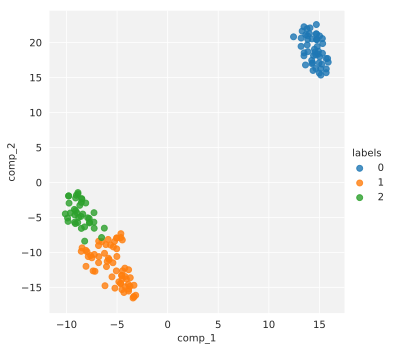

In [26]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(data_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = labels
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj ,fit_reg=False)
print("ready")
